# **Data Visulaization and Manipulation**


In [8]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/content/email.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.shape

(5573, 2)

In [11]:
data.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
data.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


<ipython-input-15-880691e3d156>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='viridis')


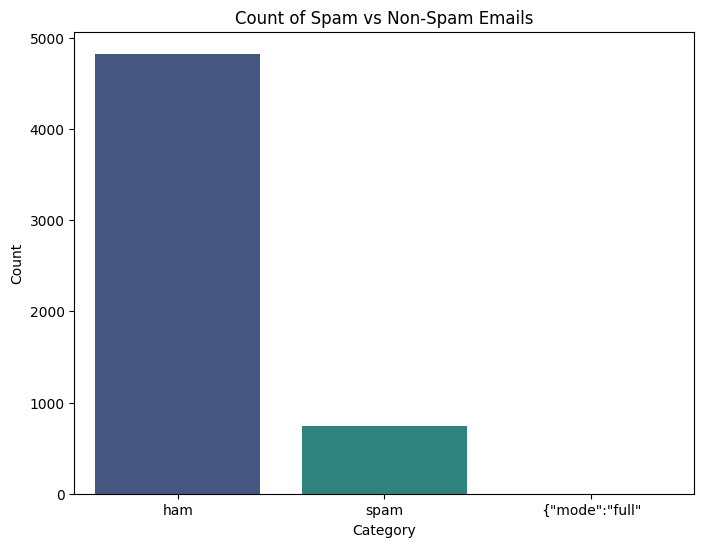

In [15]:
# Count plot of spam vs non-spam emails
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=data, palette='viridis')
plt.title('Count of Spam vs Non-Spam Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

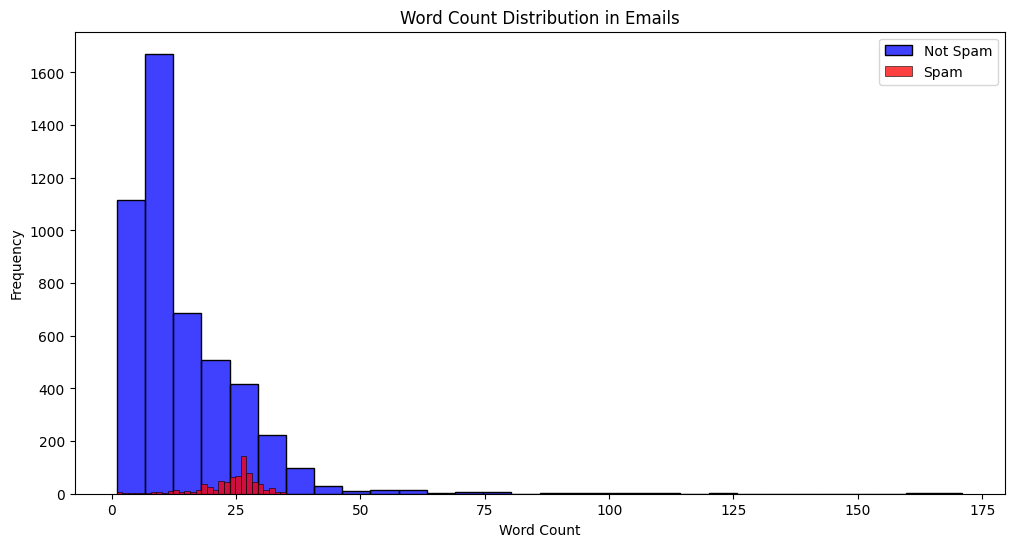

In [16]:
# Word count distribution
data['word_count'] = data['Message'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Category'] == 'ham']['word_count'], bins=30, color='blue', label='Not Spam')
sns.histplot(data[data['Category'] == 'spam']['word_count'], bins=30, color='red', label='Spam')
plt.title('Word Count Distribution in Emails')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [17]:
# Top 20 most frequent words in spam and non-spam emails
from collections import Counter
from wordcloud import WordCloud

def plot_top_words(emails, title):
    all_words = ' '.join(emails)
    word_freq = Counter(all_words.split())
    common_words = dict(word_freq.most_common(20))

    plt.figure(figsize=(10, 6))
    plt.bar(common_words.keys(), common_words.values(), color='green')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

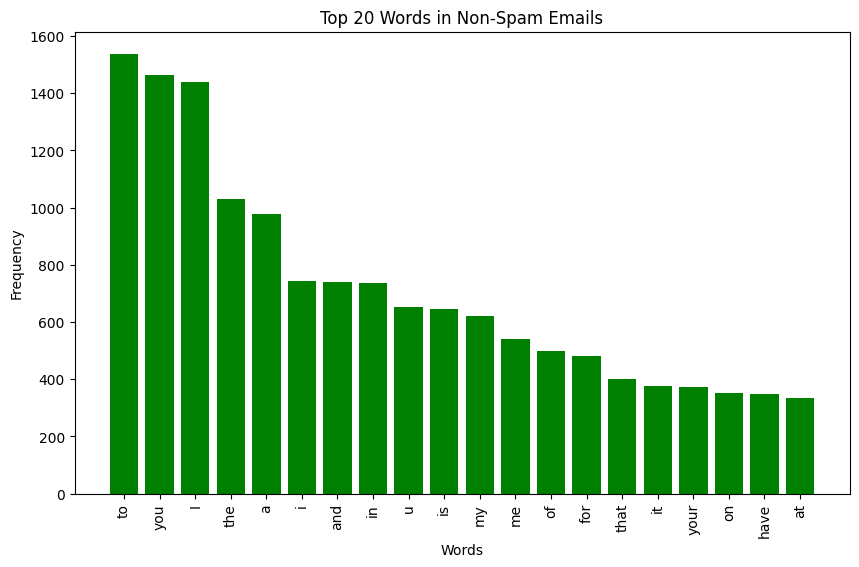

In [19]:
# Top words in non-spam emails
plot_top_words(data[data['Category'] == 'ham']['Message'], 'Top 20 Words in Non-Spam Emails')



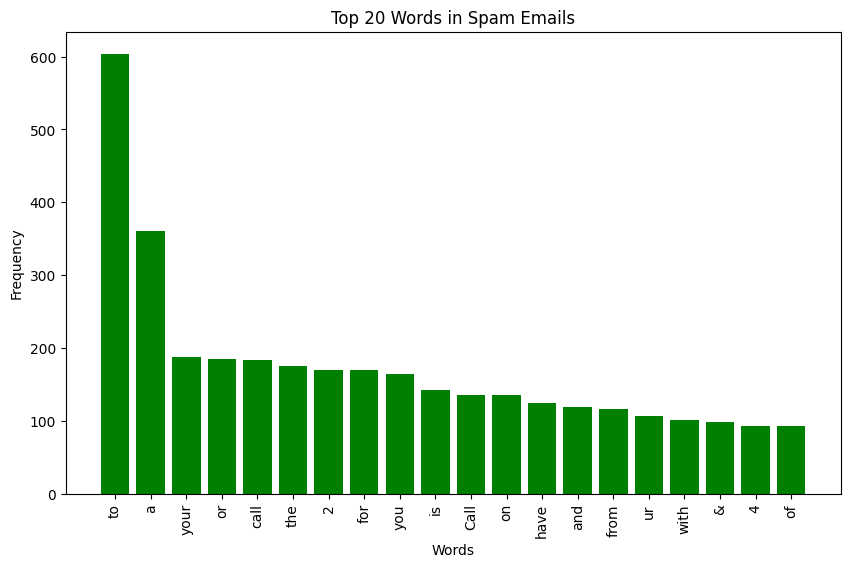

In [20]:
# Top words in spam emails
plot_top_words(data[data['Category'] == 'spam']['Message'], 'Top 20 Words in Spam Emails')

# **Data Cleaning**

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
data["Category"] = encoder.fit_transform(data["Category"])
data.head()

,Category,Message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


In [23]:
data.isnull().sum()

Category      0
Message       0
word_count    0
dtype: int64

In [24]:
data.duplicated().sum()
data.drop_duplicates(keep = "first")

# Filter by Category values 0 or 1
data = data[(data['Category'] == 0) | (data['Category'] == 1)]

data

,Category,Message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30
5568,0,Will ü b going to esplanade fr home?,8
5569,0,"Pity, * was in mood for that. So...any other s...",10
5570,0,The guy did some bitching but I acted like i'd...,26


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [29]:
pip install nltk


In [30]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stop_words = stopwords.words('english')

# this function will preprocess the text data
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stop_words and word not in string.punctuation]  # Remove stop words
    text = [nltk.PorterStemmer().stem(word) for word in text]  # Stemming
    return text

In [35]:
preprocess_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

["'m",
 'gon',
 'na',
 'home',
 'soon',
 "n't",
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 "'ve",
 'cri',
 'enough',
 'today']

In [36]:
pre_data = data.copy()
pre_data['Message'] = pre_data['Message'].apply(preprocess_text)

In [37]:
pre_data.head()

,Category,Message,word_count
0,0,"[go, jurong, point, crazi, .., avail, bugi, n,...",20
1,0,"[ok, lar, ..., joke, wif, u, oni, ...]",6
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",28
3,0,"[u, dun, say, earli, hor, ..., u, c, alreadi, ...",11
4,0,"[nah, n't, think, goe, usf, live, around, though]",13


In [38]:
# Convert each list of words back to a single string
Extracted_data = pre_data.copy()
Extracted_data['Message'] = pre_data['Message'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(Extracted_data['Message'])

#**Model Training using Naive Bayes Classifier and Support Vector Machine**

In machine learning, data splitting involves dividing the dataset into **training** and **testing sets** to assess model performance effectively. The training set, typically comprising **70-80% of the data**, is used to train the model by learning patterns from input features and corresponding outputs. The remaining **20-30%,** the testing set, remains unseen during training and serves as a gauge for how well the model generalizes to new data. This approach ensures that the model's performance can be evaluated independently from the training process, helping detect overfitting and providing insights into its ability to handle real-world scenarios. Random and stratified splitting methods are commonly employed to maintain data integrity and ensure that both sets accurately represent the dataset's characteristics, particularly useful in maintaining class balance for classification tasks.

In [39]:
x_train , x_test , y_train , y_test = train_test_split(X , Extracted_data['Category'] , test_size = 0.2)

**Naive Bayes Classifier**: Naive Bayes is a probabilistic machine learning model based on Bayes' theorem with a strong assumption of independence among features. It is particularly efficient for classification tasks, especially with high-dimensional data, due to its simplicity and ability to handle large datasets quickly. Naive Bayes calculates the probability of each class given a set of features and predicts the class with the highest probability. Despite its "naive" assumption of feature independence, it often performs surprisingly well in practice, making it popular for tasks like text classification and spam detection.

In [43]:
# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Predict using the Naive Bayes model
nb_predictions = nb_model.predict(x_test)

**Support Vector Machine (SVM) Classifier**: SVM is a powerful supervised learning algorithm used for classification, regression, and outlier detection. It works by finding the optimal hyperplane that best separates data points into different classes in a high-dimensional space. SVMs are effective in cases where the data is not linearly separable by transforming the input space into a higher dimension using kernel functions. This algorithm aims to maximize the margin between classes, making it robust to overfitting and capable of handling complex decision boundaries. SVMs are widely used in various applications, including image classification, bioinformatics, and text categorization, due to their versatility and strong theoretical foundation.

In [44]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Predict using the SVM model
svm_predictions = svm_model.predict(x_test)

#**Model evaluation**

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test, nb_predictions, and svm_predictions are defined after making predictions
y_true = y_test  # Assuming y_test is the true labels for the test set

# Evaluate the models
nb_metrics = {
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_true, nb_predictions),
    'Precision': precision_score(y_true, nb_predictions),
    'Recall': recall_score(y_true, nb_predictions),
    'F1 Score': f1_score(y_true, nb_predictions)
}

svm_metrics = {
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_true, svm_predictions),
    'Precision': precision_score(y_true, svm_predictions),
    'Recall': recall_score(y_true, svm_predictions),
    'F1 Score': f1_score(y_true, svm_predictions)
}

# Print the metrics
for metric in [nb_metrics, svm_metrics]:
    print(f"{metric['Model']} Metrics:")
    print(f"  Accuracy: {metric['Accuracy']:.4f}")
    print(f"  Precision: {metric['Precision']:.4f}")
    print(f"  Recall: {metric['Recall']:.4f}")
    print(f"  F1 Score: {metric['F1 Score']:.4f}")
    print()


Naive Bayes Metrics:
  Accuracy: 0.9812
  Precision: 0.9306
  Recall: 0.9241
  F1 Score: 0.9273

SVM Metrics:
  Accuracy: 0.9848
  Precision: 0.9923
  Recall: 0.8897
  F1 Score: 0.9382



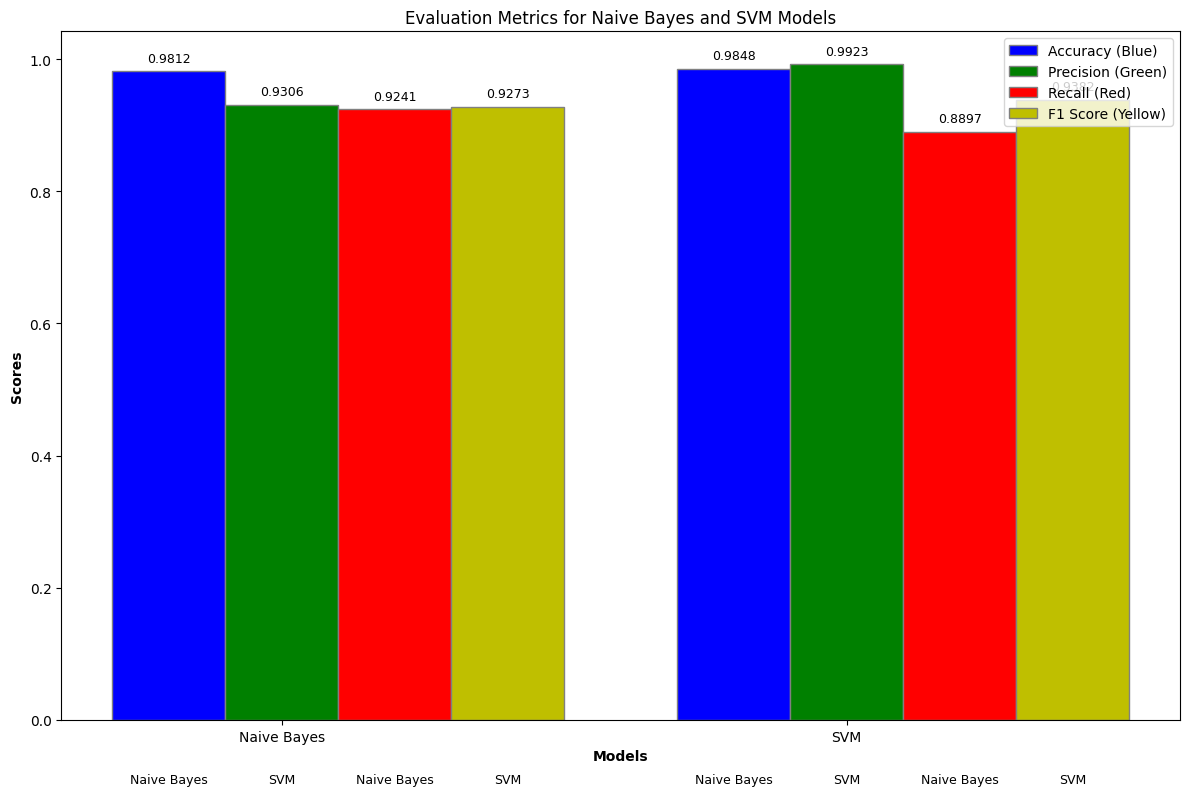

In [63]:
# Sample data (replace with your actual values)
metrics_names = ['Naive Bayes', 'SVM']
accuracy_scores = [0.9812, 0.9848]
precision_scores = [0.9306, 0.9923]
recall_scores = [0.9241, 0.8897]
f1_scores = [0.9273, 0.9382]

# Set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(metrics_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(12, 8))
bars1 = plt.bar(r1, accuracy_scores, color='b', width=bar_width, edgecolor='grey', label='Accuracy (Blue)')
bars2 = plt.bar(r2, precision_scores, color='g', width=bar_width, edgecolor='grey', label='Precision (Green)')
bars3 = plt.bar(r3, recall_scores, color='r', width=bar_width, edgecolor='grey', label='Recall (Red)')
bars4 = plt.bar(r4, f1_scores, color='y', width=bar_width, edgecolor='grey', label='F1 Score (Yellow)')

# Add labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Evaluation Metrics for Naive Bayes and SVM Models')
plt.xticks([r + bar_width for r in range(len(metrics_names))], metrics_names)
plt.legend()

# Add labels below each bar
for bars, models in zip([bars1, bars2, bars3, bars4], ['Naive Bayes', 'SVM']*4):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=9)
        plt.text(bar.get_x() + bar.get_width() / 2, -0.1, models, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# **Testing of both models**

In [64]:
# Preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]

    # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    return tokens

In [65]:
# Function to predict text using a given model
def predict_text(text, model, vectorizer):
    # Preprocess the text
    processed_text = preprocess_text(text)

    # Vectorize the processed text
    text_vectorized = vectorizer.transform([' '.join(processed_text)])

    # Predict using the trained classifier
    prediction = model.predict(text_vectorized)
    if prediction[0] == 1:
        return "SPAM"
    else:
        return "Not Spam"

In [66]:
# Test the text using both models
test_text = """We offer you a service to watch all international channels and sports tournaments also movies and series of all the world we have also moveis of netflix,Disney+,Apple+, .....

🛒 Visit our website 🔗 :
 https://iptvdenvay.com/

🛒 Contact via WhatsApp ✉ :
 https://wa.me/212703327429

our iptv service provide :

🔥 Free trial test
🔥Goodbye freezing issues!
💰 best prices
✔ Guaranteed quality
📺 40,000+ live TV channels
🎥 60,000+ VOD movies and series with Multi-Language 🇩🇪🇮🇹🇺🇸🇬🇧🇹🇷 (daily updates 🔝)
📺 TV guide (EPG) included
📱 Compatible with all devices: TV, Box, Smartphone, Pc or Tablet
📞 24/7 support

Best,
iptvdenvay Team"""

print(f"Naive Bayes Prediction: {predict_text(test_text, nb_model, vectorizer)}")
print(f"SVM Prediction: {predict_text(test_text, svm_model, vectorizer)}")

Naive Bayes Prediction: Not Spam
SVM Prediction: Not Spam
